# Exploratory Data Analysis for Telco Customer Churn

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set_theme(style="whitegrid")

## Load dataset

In [15]:
data = pd.read_csv("../data/raw/telco_churn.csv")

# Display basic info
data.shape, data.columns


((7043, 21),
 Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
        'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
        'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
        'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
        'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
       dtype='object'))

## Inspect Data

In [16]:
# First few rows
data.head()

# Summary statistics
data.describe(include='all').T

# Missing values
data.isnull().sum()

# Data types
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

## Clean Data

In [17]:
# Convert “TotalCharges” to numeric
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

# Handle missing TotalCharges (convert to 0 or median)
data['TotalCharges'] = data['TotalCharges'].fillna(data['TotalCharges'].median())

# Drop customerID column
data.drop('customerID', axis=1, inplace=True)

# Convert yes/no to 1/0

binary_cols = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']

for col in binary_cols:
    data[col] = data[col].map({'Yes': 1, 'No': 0})

# One-hot encode categorical variables
data = pd.get_dummies(data, drop_first=True)
data.head()

# Check cleaned data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   SeniorCitizen                          7043 non-null   int64  
 1   Partner                                7043 non-null   int64  
 2   Dependents                             7043 non-null   int64  
 3   tenure                                 7043 non-null   int64  
 4   PhoneService                           7043 non-null   int64  
 5   PaperlessBilling                       7043 non-null   int64  
 6   MonthlyCharges                         7043 non-null   float64
 7   TotalCharges                           7043 non-null   float64
 8   Churn                                  7043 non-null   int64  
 9   gender_Male                            7043 non-null   bool   
 10  MultipleLines_No phone service         7043 non-null   bool   
 11  Mult

# EDA Visualization

## Churn Distribution

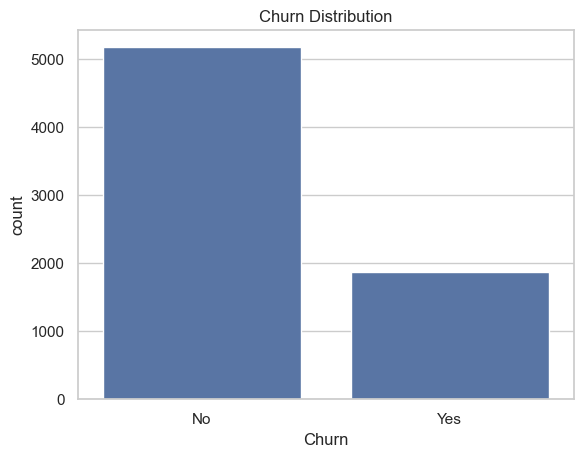

In [18]:
sns.countplot(x='Churn', data=pd.read_csv("../data/raw/telco_churn.csv"))
plt.title('Churn Distribution')
plt.show()

## Correlation Heatmap

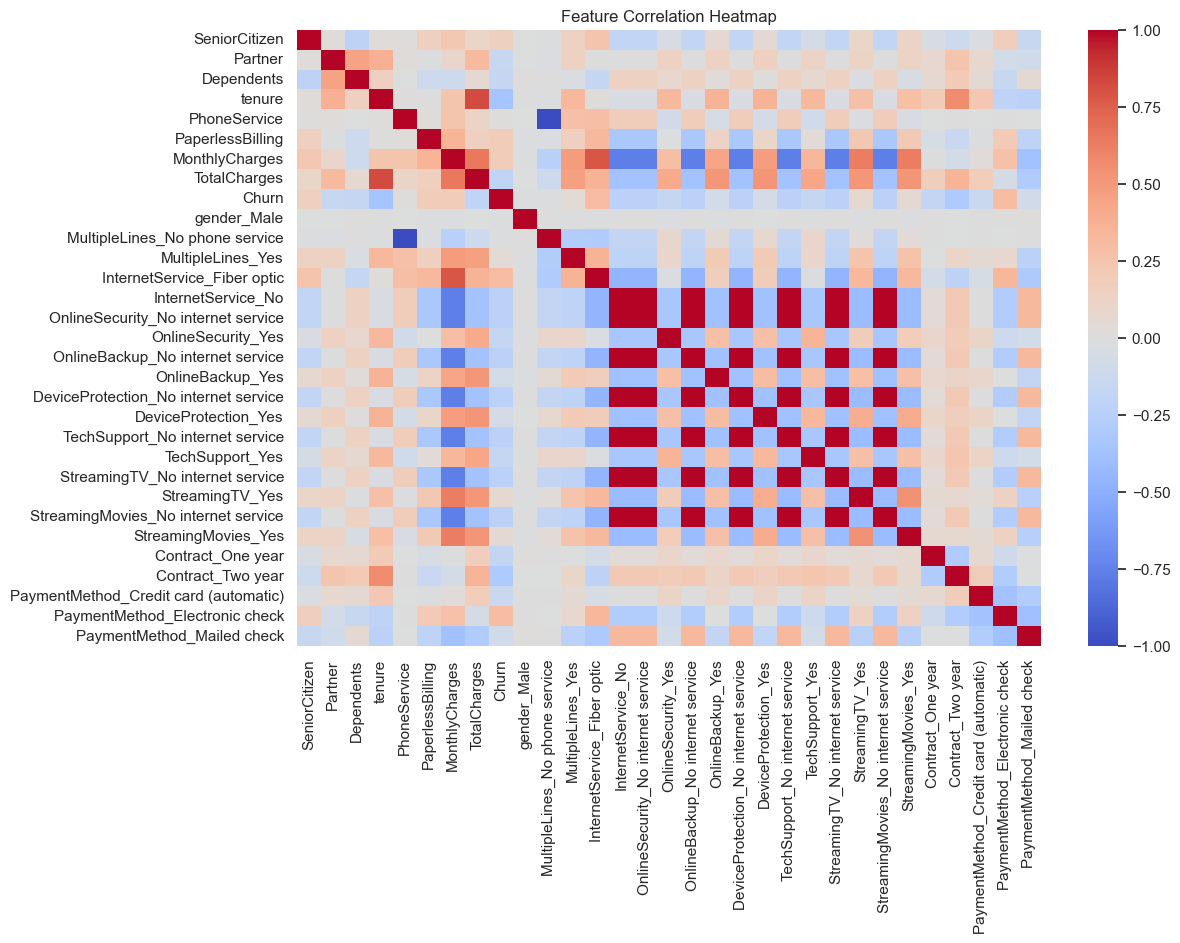

In [19]:
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(), cmap='coolwarm', center=0)
plt.title('Feature Correlation Heatmap')
plt.show()

## Churn vs Contract type

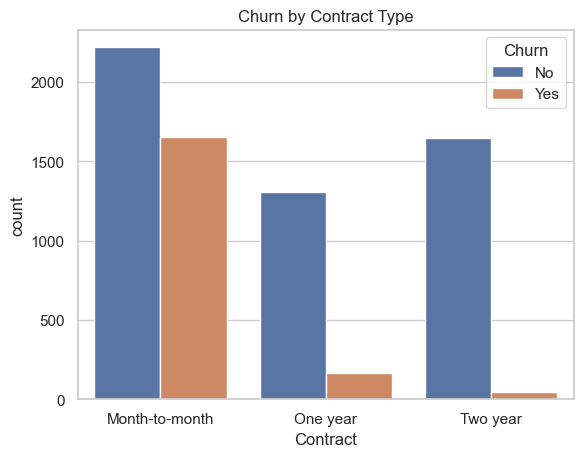

In [20]:
raw = pd.read_csv("../data/raw/telco_churn.csv")
sns.countplot(x='Contract', hue='Churn', data=raw)
plt.title('Churn by Contract Type')
plt.show()

## Save Cleaned data

In [21]:
data.to_csv("../data/processed/telco_churn_clean.csv", index=False)